## KMeans Clustering - CB4_64_16D_STK_v1

This document presents an example of spectral clustering in the CBERS4 collection (CB4_64_16D_STK_v1) of the BDC.

> This simple example aims to present how to clustering the data from the BDC stored inside the ODC. To know all the possible products, use [BDC-STAC](http://brazildatacube.dpi.inpe.br/bdc-stac/0.8.0/).

In [1]:
import datacube
import numpy as np
import matplotlib.pyplot as plt
dc = datacube.Datacube(app='datacube')

In [2]:
PRODUCT_NAME = "CB4_64_16D_STK_v1"

**Load CB4_64_16D_STK_v1 product**

Initially, an entire scene will be loaded, in a range of specific dates

In [3]:
cb4_64_16d_ftile = dc.load(PRODUCT_NAME, measurements = ['red', 'green', 'blue', 'nir'], 
                                            time = ("2019-12-19", "2019-12-31"), resolution = (64, -64))
cb4_64_16d_ftile

<xarray.Dataset>
Dimensions:      (time: 1, x: 31511, y: 34328)
Coordinates:
  * time         (time) datetime64[ns] 2019-12-19
  * y            (y) float64 8.778e+06 8.778e+06 ... 1.098e+07 1.098e+07
  * x            (x) float64 6.307e+06 6.307e+06 6.307e+06 ... 4.29e+06 4.29e+06
    spatial_ref  int32 0
Data variables:
    red          (time, y, x) int16 -9999 -9999 -9999 ... -9999 -9999 -9999
    green        (time, y, x) int16 -9999 -9999 -9999 ... -9999 -9999 -9999
    blue         (time, y, x) int16 -9999 -9999 -9999 ... -9999 -9999 -9999
    nir          (time, y, x) int16 -9999 -9999 -9999 ... -9999 -9999 -9999
Attributes:
    crs:           +proj=aea +lat_0=-12 +lon_0=-54 +lat_1=-2 +lat_2=-22 +x_0=...
    grid_mapping:  spatial_ref

The example will use only a portion of the data that was uploaded. If necessary, in your analysis you can use the whole scene that was uploaded.

In [4]:
cb4_64_16d_stile = cb4_64_16d_ftile.isel(x = slice(0, 1500), y = slice(0, 1500))
cb4_64_16d_stile

<xarray.Dataset>
Dimensions:      (time: 1, x: 1500, y: 1500)
Coordinates:
  * time         (time) datetime64[ns] 2019-12-19
  * y            (y) float64 8.778e+06 8.778e+06 ... 8.874e+06 8.874e+06
  * x            (x) float64 6.307e+06 6.307e+06 ... 6.211e+06 6.211e+06
    spatial_ref  int32 0
Data variables:
    red          (time, y, x) int16 -9999 -9999 -9999 -9999 ... 449 441 497 682
    green        (time, y, x) int16 -9999 -9999 -9999 -9999 ... 602 592 677 830
    blue         (time, y, x) int16 -9999 -9999 -9999 -9999 ... 284 268 358 392
    nir          (time, y, x) int16 -9999 -9999 -9999 -9999 ... 3658 3940 4082
Attributes:
    crs:           +proj=aea +lat_0=-12 +lon_0=-54 +lat_1=-2 +lat_2=-22 +x_0=...
    grid_mapping:  spatial_ref

Viewing the selected region

In [5]:
from utils.data_cube_utilities.dc_rgb import rgb

(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2a7db51048>)

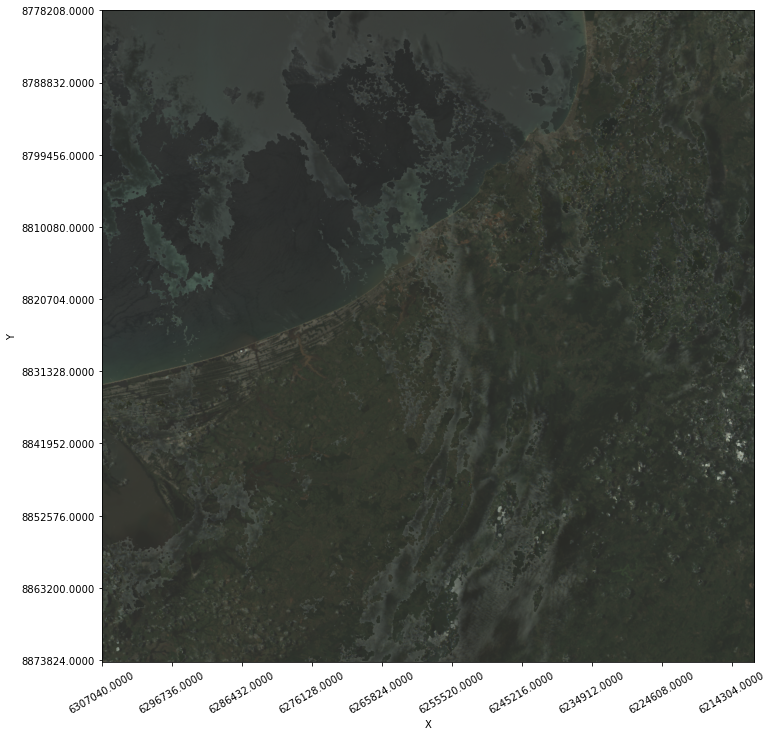

In [6]:
rgb(cb4_64_16d_stile, figsize = (12, 12), x_coord = 'x', y_coord = 'y')

## Clustering with KMeans

In this section, the clustering using KMeans is performed

In [7]:
from sklearn.cluster import KMeans
from utils.data_cube_utilities.dc_clustering import clustering_pre_processing

Below is the definition of the bands and the preparation of the data for clustering

In [8]:
bands = ['red', 'green', 'nir']

In [9]:
cb4_64_16d_stilec = cb4_64_16d_stile.copy()
cb4_64_16d_stilec_rgb = cb4_64_16d_stilec[bands]

cb4_64_16d_stilec_rgb = cb4_64_16d_stilec_rgb.sel(time = '2019-12-19')

Clustering!

In [10]:
features = clustering_pre_processing(cb4_64_16d_stilec_rgb, bands)

In [11]:
kmodel = KMeans(3).fit(features)

Setting the output to display

In [12]:
shape = cb4_64_16d_stilec_rgb[bands[0]].values.shape

classification = np.full(shape, -1)
classification = kmodel.labels_

Viewing the result

In [13]:
res = classification.reshape((1500, 1500))

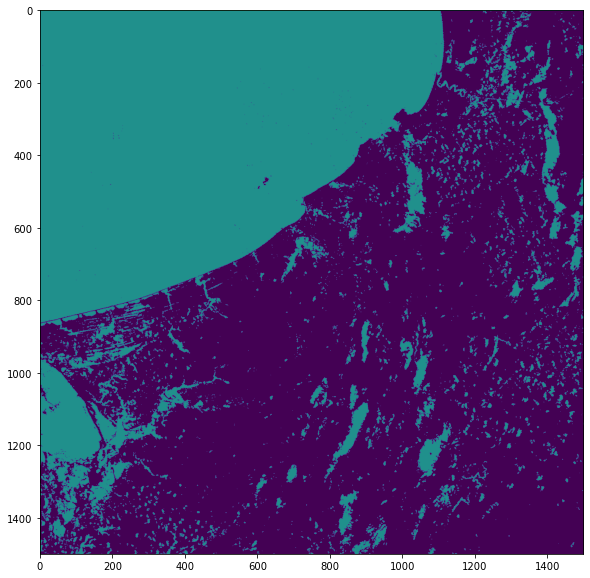

In [14]:
plt.figure(figsize = (10, 10))
plt.imshow(res)